# [Presentation Slides](https://www.canva.com/design/DAEegFDHj5Q/BC1u2Xc4aD11TuJvz1LczA/view?utm_content=DAEegFDHj5Q&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink)

# 0. Install condacolab
It is important that you perform the installation first thing in the notebook because it will require a kernel restart, thus resetting the variables set up to that point.

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:36
🔁 Restarting kernel...


## Install RDKit

In [ ]:
! conda install -c conda-forge rdkit

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-1.74.0               |   py37h6dcda5c_3         342 KB  conda-forge
    boost-cpp-1.74.0           |       hc6e9bd1_3        16.3 MB  conda-forge
    cairo-1.16.0               |    h6cf1ce9_1008         1.5 MB  conda-forge
    conda-4.10.1               |   py37h89c1867_0         3.1 MB  conda-forge
    cycler-0.10.0              |             py_2           9 KB  conda-forge
    fontconfig-2.13.1          |    hba837de_1005         357 KB  conda-forge
    freetype-2.10.4            |       h0708190_1         890 KB  conda-forge
    gettext-0.19.8.1           |    h0b5b191_1005   

In [ ]:
import rdkit
print(rdkit.__version__)

2021.03.2


# 1. Extract approved drugs data from ChEMBL database

## 1. Install ChEMBL webresource client
[ChEMBL webresource client](https://https://github.com/chembl/chembl_webresource_client) is the only official Python client library developed and supported by ChEMBL group.

In [ ]:
! pip install chembl_webresource_client

     |████████████████████████████████| 55 kB 2.2 MB/s 
  Created wheel for easydict: filename=easydict-1.9-py3-none-any.whl size=6350 sha256=dd15c66b8c1ead75da413232ae7451f2b040e9542cbd7b0584fa413be57a7cbe
  Stored in directory: /root/.cache/pip/wheels/88/96/68/c2be18e7406804be2e593e1c37845f2dd20ac2ce1381ce40b0
Successfully built easydict


## 2. Data Collection from [ChEMBL Database](https://www.ebi.ac.uk/chembl) and Data Pre-Processing

In [ ]:
from chembl_webresource_client.new_client import new_client
molecule = new_client.molecule
approved_drugs = molecule.filter(max_phase=4)

In [ ]:
approved_drugs

[{'atc_classifications': ['C02CA01'], 'availability_type': 1, 'biotherapeutic': None, 'black_box_warning': 0, 'chebi_par_id': 8364, 'chirality': 2, 'cross_references': [{'xref_id': 'prazosin%20hydrochloride', 'xref_name': 'prazosin hydrochloride', 'xref_src': 'DailyMed'}, {'xref_id': '11112649', 'xref_name': 'SID: 11112649', 'xref_src': 'PubChem'}, {'xref_id': '11112650', 'xref_name': 'SID: 11112650', 'xref_src': 'PubChem'}, {'xref_id': '11113367', 'xref_name': 'SID: 11113367', 'xref_src': 'PubChem'}, {'xref_id': '124882482', 'xref_name': 'SID: 124882482', 'xref_src': 'PubChem'}, {'xref_id': '124882484', 'xref_name': 'SID: 124882484', 'xref_src': 'PubChem'}, {'xref_id': '124882486', 'xref_name': 'SID: 124882486', 'xref_src': 'PubChem'}, {'xref_id': '124882487', 'xref_name': 'SID: 124882487', 'xref_src': 'PubChem'}, {'xref_id': '144207195', 'xref_name': 'SID: 144207195', 'xref_src': 'PubChem'}, {'xref_id': '170465415', 'xref_name': 'SID: 170465415', 'xref_src': 'PubChem'}, {'xref_id': '

In [ ]:
%%time
import pandas as pd
df_drugs = pd.DataFrame(approved_drugs) # This takes about 7 minutes.

CPU times: user 4.76 s, sys: 532 ms, total: 5.29 s
Wall time: 5min 46s


In [ ]:
df_drugs.head()

,atc_classifications,availability_type,biotherapeutic,black_box_warning,chebi_par_id,chirality,cross_references,dosed_ingredient,first_approval,first_in_class,helm_notation,indication_class,inorganic_flag,max_phase,molecule_chembl_id,molecule_hierarchy,molecule_properties,molecule_structures,molecule_synonyms,molecule_type,natural_product,oral,parenteral,polymer_flag,pref_name,prodrug,structure_type,therapeutic_flag,topical,usan_stem,usan_stem_definition,usan_substem,usan_year,withdrawn_class,withdrawn_country,withdrawn_flag,withdrawn_reason,withdrawn_year
0,[C02CA01],1,None,0,8364.0,2,"[{'xref_id': 'prazosin%20hydrochloride', 'xref...",False,1976.0,0,None,Antihypertensive,0,4,CHEMBL2,"{'molecule_chembl_id': 'CHEMBL2', 'parent_chem...","{'alogp': '1.78', 'aromatic_rings': 3, 'cx_log...",{'canonical_smiles': 'COc1cc2nc(N3CCN(C(=O)c4c...,"[{'molecule_synonym': 'CP-12299', 'syn_type': ...",Small molecule,0,True,False,False,PRAZOSIN,0,MOL,True,False,-azosin,antihypertensives (prazosin type),-azosin,1968.0,None,None,False,None,NaN
1,[N07BA01],2,None,0,17688.0,1,"[{'xref_id': 'nicotine', 'xref_name': 'nicotin...",True,1984.0,0,None,Smoking Cessation Adjunct,0,4,CHEMBL3,"{'molecule_chembl_id': 'CHEMBL3', 'parent_chem...","{'alogp': '1.85', 'aromatic_rings': 1, 'cx_log...","{'canonical_smiles': 'CN1CCC[C@H]1c1cccnc1', '...","[{'molecule_synonym': 'Habitrol', 'syn_type': ...",Small molecule,0,True,False,False,NICOTINE,0,MOL,True,True,None,None,None,1985.0,None,None,False,None,NaN
2,"[J01MA01, S01AE01, S02AA16]",1,None,1,7731.0,0,"[{'xref_id': 'ofloxacin', 'xref_name': 'ofloxa...",True,1990.0,0,None,Antibacterial,0,4,CHEMBL4,"{'molecule_chembl_id': 'CHEMBL4', 'parent_chem...","{'alogp': '1.54', 'aromatic_rings': 2, 'cx_log...",{'canonical_smiles': 'CC1COc2c(N3CCN(C)CC3)c(F...,"[{'molecule_synonym': 'DL-8280', 'syn_type': '...",Small molecule,0,True,True,False,OFLOXACIN,0,MOL,True,True,-oxacin,antibacterials (quinolone derivatives),-oxacin,1984.0,None,None,False,None,NaN
3,[J01MB02],0,None,0,100147.0,2,"[{'xref_id': '120913', 'xref_name': 'SID: 1209...",True,1964.0,0,None,Antibacterial,0,4,CHEMBL5,"{'molecule_chembl_id': 'CHEMBL5', 'parent_chem...","{'alogp': '1.42', 'aromatic_rings': 2, 'cx_log...",{'canonical_smiles': 'CCn1cc(C(=O)O)c(=O)c2ccc...,"[{'molecule_synonym': 'Mictral', 'syn_type': '...",Small molecule,0,True,False,False,NALIDIXIC ACID,0,MOL,True,False,nal-,narcotic agonists/antagonists (normorphine type),nal-,1962.0,None,None,False,None,NaN
4,"[S01BC01, C01EB03, M02AA23, M01AB51, M01AB01]",1,None,1,49662.0,2,"[{'xref_id': 'indomethacin', 'xref_name': 'ind...",True,1965.0,0,None,Anti-Inflammatory,0,4,CHEMBL6,"{'molecule_chembl_id': 'CHEMBL6', 'parent_chem...","{'alogp': '3.93', 'aromatic_rings': 3, 'cx_log...",{'canonical_smiles': 'COc1ccc2c(c1)c(CC(=O)O)c...,"[{'molecule_synonym': 'Artracin', 'syn_type': ...",Small molecule,0,True,True,False,INDOMETHACIN,0,MOL,True,True,None,None,None,1963.0,None,None,False,None,NaN


In [ ]:
df_oraldrugs = df_drugs[(df_drugs['oral'] == True) & (df_drugs['molecule_properties'].notnull())]
df_oraldrugs = df_oraldrugs.reset_index()
df_oraldrugs.head()

,index,atc_classifications,availability_type,biotherapeutic,black_box_warning,chebi_par_id,chirality,cross_references,dosed_ingredient,first_approval,first_in_class,helm_notation,indication_class,inorganic_flag,max_phase,molecule_chembl_id,molecule_hierarchy,molecule_properties,molecule_structures,molecule_synonyms,molecule_type,natural_product,oral,parenteral,polymer_flag,pref_name,prodrug,structure_type,therapeutic_flag,topical,usan_stem,usan_stem_definition,usan_substem,usan_year,withdrawn_class,withdrawn_country,withdrawn_flag,withdrawn_reason,withdrawn_year
0,0,[C02CA01],1,None,0,8364.0,2,"[{'xref_id': 'prazosin%20hydrochloride', 'xref...",False,1976.0,0,None,Antihypertensive,0,4,CHEMBL2,"{'molecule_chembl_id': 'CHEMBL2', 'parent_chem...","{'alogp': '1.78', 'aromatic_rings': 3, 'cx_log...",{'canonical_smiles': 'COc1cc2nc(N3CCN(C(=O)c4c...,"[{'molecule_synonym': 'CP-12299', 'syn_type': ...",Small molecule,0,True,False,False,PRAZOSIN,0,MOL,True,False,-azosin,antihypertensives (prazosin type),-azosin,1968.0,None,None,False,None,NaN
1,1,[N07BA01],2,None,0,17688.0,1,"[{'xref_id': 'nicotine', 'xref_name': 'nicotin...",True,1984.0,0,None,Smoking Cessation Adjunct,0,4,CHEMBL3,"{'molecule_chembl_id': 'CHEMBL3', 'parent_chem...","{'alogp': '1.85', 'aromatic_rings': 1, 'cx_log...","{'canonical_smiles': 'CN1CCC[C@H]1c1cccnc1', '...","[{'molecule_synonym': 'Habitrol', 'syn_type': ...",Small molecule,0,True,False,False,NICOTINE,0,MOL,True,True,None,None,None,1985.0,None,None,False,None,NaN
2,2,"[J01MA01, S01AE01, S02AA16]",1,None,1,7731.0,0,"[{'xref_id': 'ofloxacin', 'xref_name': 'ofloxa...",True,1990.0,0,None,Antibacterial,0,4,CHEMBL4,"{'molecule_chembl_id': 'CHEMBL4', 'parent_chem...","{'alogp': '1.54', 'aromatic_rings': 2, 'cx_log...",{'canonical_smiles': 'CC1COc2c(N3CCN(C)CC3)c(F...,"[{'molecule_synonym': 'DL-8280', 'syn_type': '...",Small molecule,0,True,True,False,OFLOXACIN,0,MOL,True,True,-oxacin,antibacterials (quinolone derivatives),-oxacin,1984.0,None,None,False,None,NaN
3,3,[J01MB02],0,None,0,100147.0,2,"[{'xref_id': '120913', 'xref_name': 'SID: 1209...",True,1964.0,0,None,Antibacterial,0,4,CHEMBL5,"{'molecule_chembl_id': 'CHEMBL5', 'parent_chem...","{'alogp': '1.42', 'aromatic_rings': 2, 'cx_log...",{'canonical_smiles': 'CCn1cc(C(=O)O)c(=O)c2ccc...,"[{'molecule_synonym': 'Mictral', 'syn_type': '...",Small molecule,0,True,False,False,NALIDIXIC ACID,0,MOL,True,False,nal-,narcotic agonists/antagonists (normorphine type),nal-,1962.0,None,None,False,None,NaN
4,4,"[S01BC01, C01EB03, M02AA23, M01AB51, M01AB01]",1,None,1,49662.0,2,"[{'xref_id': 'indomethacin', 'xref_name': 'ind...",True,1965.0,0,None,Anti-Inflammatory,0,4,CHEMBL6,"{'molecule_chembl_id': 'CHEMBL6', 'parent_chem...","{'alogp': '3.93', 'aromatic_rings': 3, 'cx_log...",{'canonical_smiles': 'COc1ccc2c(c1)c(CC(=O)O)c...,"[{'molecule_synonym': 'Artracin', 'syn_type': ...",Small molecule,0,True,True,False,INDOMETHACIN,0,MOL,True,True,None,None,None,1963.0,None,None,False,None,NaN


In [ ]:
df_oraldrugs.shape

(1711, 39)

In [ ]:
df_oraldrugs['molecule_properties'][0]

{'alogp': '1.78',
 'aromatic_rings': 3,
 'cx_logd': '1.43',
 'cx_logp': '1.65',
 'cx_most_apka': None,
 'cx_most_bpka': '7.24',
 'full_molformula': 'C19H21N5O4',
 'full_mwt': '383.41',
 'hba': 8,
 'hba_lipinski': 9,
 'hbd': 1,
 'hbd_lipinski': 2,
 'heavy_atoms': 28,
 'molecular_species': 'NEUTRAL',
 'mw_freebase': '383.41',
 'mw_monoisotopic': '383.1594',
 'num_lipinski_ro5_violations': 0,
 'num_ro5_violations': 0,
 'psa': '106.95',
 'qed_weighted': '0.73',
 'ro3_pass': 'N',
 'rtb': 4}

In [ ]:
df_oraldrugs['molecule_properties'].apply(lambda x: x['alogp'])

0        1.78
1        1.85
2        1.54
3        1.42
4        3.93
        ...  
1706     2.27
1707     2.27
1708    -0.16
1709    -0.16
1710    -0.16
Name: molecule_properties, Length: 1711, dtype: object

In [ ]:
mw = df_oraldrugs['molecule_properties'].apply(lambda x: float(x['mw_freebase']))
year = df_oraldrugs['first_approval']
ro5 = df_oraldrugs['molecule_properties'].apply(lambda x: x['num_lipinski_ro5_violations'])

In [ ]:
df_ro5 = pd.DataFrame({'year': year, 'ro5': ro5}).dropna().reset_index(drop=True)
df_ro5 = df_ro5.astype(int)
df_ro5.head()

,year,ro5
0,1976,0
1,1984,0
2,1990,0
3,1964,0
4,1965,0


## 3. Data Visualization (Trend in No. of Rule of 5 Violations)

In [ ]:
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.palettes import Spectral5
from bokeh.plotting import figure, show, output_notebook

output_notebook()

year_range = range(1981, 2021)
x = [str(x) for x in year_range]

violations = ['viol0', 'viol1', 'viol2', 'viol3', 'viol4']

df_count = df_ro5.groupby(['year', 'ro5']).agg({'ro5': ['count']})
df_count.columns = ['count']
df_count = df_count.reset_index()

viol0 = [0 if df_count.query('year == @x and ro5 == 0')['count'].empty
         else int(df_count.query('year == @x and ro5 == 0')['count']) for x in year_range]
viol1 = [0 if df_count.query('year == @x and ro5 == 1')['count'].empty
         else int(df_count.query('year == @x and ro5 == 1')['count']) for x in year_range]
viol2 = [0 if df_count.query('year == @x and ro5 == 2')['count'].empty
         else int(df_count.query('year == @x and ro5 == 2')['count']) for x in year_range]
viol3 = [0 if df_count.query('year == @x and ro5 == 3')['count'].empty
         else int(df_count.query('year == @x and ro5 == 3')['count']) for x in year_range]
viol4 = [0 if df_count.query('year == @x and ro5 == 4')['count'].empty
         else int(df_count.query('year == @x and ro5 == 4')['count']) for x in year_range]

viol_sum = list(map(sum, zip(viol0, viol1, viol2, viol3, viol4)))

source = ColumnDataSource(data=dict(
    x=x,
    viol0=[x/y*100 for x, y in zip(viol0, viol_sum)],
    viol1=[x/y*100 for x, y in zip(viol1, viol_sum)],
    viol2=[x/y*100 for x, y in zip(viol2, viol_sum)],
    viol3=[x/y*100 for x, y in zip(viol3, viol_sum)],
    viol4=[x/y*100 for x, y in zip(viol4, viol_sum)],
))

TOOLTIPS = [
    ('% of compounds', '@$name{0.0} %')
]
p = figure(x_range=FactorRange(*x), plot_height=250,
           toolbar_location=None, tools='hover', tooltips=TOOLTIPS,
           x_axis_label='Year', y_axis_label='% of compounds')

p.vbar_stack(violations, x='x', width=1, alpha=0.5, line_color=None, fill_color=Spectral5,
             source=source, legend_label=['0', '1', '2', '3', '4'])

p.y_range.start = 0
p.y_range.end = 100
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None
p.legend.location = 'bottom_right'
p.legend.orientation = 'horizontal'
p.legend.title = 'No. of RO5 Violations'

show(p)

## 3. Data Visualization (Trend in QED)

In [ ]:
qed = df_oraldrugs['molecule_properties'].apply(lambda x: x['qed_weighted'])
df_qed = pd.DataFrame({'year': year, 'qed': qed}).dropna().reset_index(drop=True)
df_qed = df_qed.astype({'year': int, 'qed': float})
df_qed.head()

,year,qed
0,1976,0.73
1,1984,0.63
2,1990,0.87
3,1964,0.85
4,1965,0.77


In [ ]:
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.palettes import Spectral5
from bokeh.plotting import figure, show, output_notebook

output_notebook()

df_qed_stats = df_qed.groupby(['year'], as_index=False).agg({'year': 'first', 'qed':['mean','std']})
df_qed_stats = df_qed_stats.fillna(0)
df_qed_stats.columns = ['year', 'mean', 'std']

source = ColumnDataSource(df_qed_stats)

TOOLTIPS = [
    ('Year', '$x{0}'),
    ('QED', '$y')
]

p = figure(plot_height=250,
           toolbar_location=None, tools='hover', tooltips=TOOLTIPS,
           x_axis_label='Year', y_axis_label='QED')

p.circle(x='year', y='mean', color='red', size=5, line_alpha=0, source=source)
p.line(x='year', y='mean', color='red', source=source)

# create the coordinates for the errorbars
err_x = []
err_y = []
for i, row in df_qed_stats.iterrows():
    err_x.append((row.year, row.year))
    err_y.append((row['mean'] - row['std'], row['mean'] + row['std']))
p.multi_line(err_x, err_y, color='red')

p.y_range.start = 0
p.y_range.end = 1
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

# 2. Create Desirability Score (QED)

## Convert SMILES to Molecule Object

In [ ]:
molecule_structures = df_oraldrugs['molecule_structures'].dropna()
canonical_smiles = molecule_structures.apply(lambda x: x['canonical_smiles'])

In [ ]:
from rdkit import Chem
mols = [Chem.MolFromSmiles(x) for x in canonical_smiles]

## Display Molecules

In [ ]:
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
MolsToGridImage(mols[-12:], molsPerRow=4, subImgSize=(400,400))

## Standardize Chemical Structures

In [ ]:
from rdkit.Chem.MolStandardize.rdMolStandardize import LargestFragmentChooser, Uncharger
fragmentChooser = LargestFragmentChooser()
uncharger = Uncharger()
mols = [fragmentChooser.choose(x) for x in mols]
mols = [uncharger.uncharge(x) for x in mols]

In [ ]:
MolsToGridImage(mols[-12:], molsPerRow=4, subImgSize=(400,400))

## Calculate Descriptors Used in QED

In [ ]:
from rdkit.Chem import Descriptors, Lipinski
mw = [Descriptors.MolWt(m) for m in mols]
logp = [Descriptors.MolLogP(m) for m in mols]
hbd = [Lipinski.NumHDonors(m) for m in mols]
hba = [Lipinski.NumHAcceptors(m) for m in mols]
tpsa = [Descriptors.TPSA(m) for m in mols]
rotb = [Lipinski.NumRotatableBonds(m) for m in mols]
arom = [Lipinski.NumAromaticRings(m) for m in mols]

### Download SMARTS String List for Custom Alert

In [ ]:
! wget https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3524573/bin/NIHMS50746-supplement-UnwantedGroups.sma

In [ ]:
custom_alerts = []
with open('/content/NIHMS50746-supplement-UnwantedGroups.sma', 'r') as f:
    for line in f:
        smarts = line.strip()
        patt = Chem.MolFromSmarts(smarts)
        if patt is not None:
            custom_alerts.append(patt)

def calculateNumALERTS(mol):
    alerts_hits = [1 if mol.HasSubstructMatch(p) else 0 for p in custom_alerts]
    return sum(alerts_hits)

In [ ]:
alert = [calculateNumALERTS(m) for m in mols]

## Plot Histogram of Each Descriptor

In [ ]:
import numpy as np
from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_notebook, show

output_notebook()

def make_plot(title, hist, edges, x):
    p = figure(title=title, tools='', background_fill_color="#fafafa")
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
           fill_color="navy", line_color="white", alpha=0.5)
    p.y_range.start = 0
    p.xaxis.axis_label = 'x'
    p.yaxis.axis_label = 'Frequency'
    p.grid.grid_line_color="white"
    return p


hist, edges = np.histogram(mw, bins=30)
x = np.linspace(0, 1000, 1000)
p1 = make_plot('Molecular Weight', hist, edges, x)

hist, edges = np.histogram(logp, bins=30)
x = np.linspace(0, 1000, 1000)
p2 = make_plot('Lipophilicity (MolLogP)', hist, edges, x)

hist, edges = np.histogram(hbd, bins=30)
x = np.linspace(0, 1000, 1000)
p3 = make_plot('Number of Hydrogen Bond Donors (HBD)', hist, edges, x)

hist, edges = np.histogram(hba, bins=30)
x = np.linspace(0, 1000, 1000)
p4 = make_plot('Number of Hydrogen Bond Acceptors (HBA)', hist, edges, x)

hist, edges = np.histogram(tpsa, bins=30)
x = np.linspace(0, 1000, 1000)
p5 = make_plot('Polar Surface Area (PSA)', hist, edges, x)

hist, edges = np.histogram(rotb, bins=30)
x = np.linspace(0, 1000, 1000)
p6 = make_plot('Number of Rotatable Bonds', hist, edges, x)

hist, edges = np.histogram(arom, bins=6)
x = np.linspace(0, 1000, 1000)
p7 = make_plot('Number of Aromatic Rings', hist, edges, x)

hist, edges = np.histogram(alert, bins=6)
x = np.linspace(0, 1000, 1000)
p8 = make_plot('Number of Structural Alerts', hist, edges, x)

show(gridplot([p1, p2, p3, p4, p5, p6, p7, p8], ncols=2, plot_width=400, plot_height=400, toolbar_location=None))

## Use Asymmetric Double Sigmoidal (ADS) Function as the Desirability Function
$d(x)=a+\frac{b}{\left[1+\exp{\left(-\frac{x-c+\frac{d}{2}}{e}\right)}\right]}\cdot\left[1-\frac{1}{\left[1+\exp{\left(-\frac{x-c-\frac{d}{2}}{f}\right)}\right]}\right]$

In [ ]:
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

# Define fit function.
def fit_function(x, a, b, c, d, e, f):
    return (a + (b/(1 + np.exp(-1.0 * (x-c+d/2) / e))) * (1 - 1 / (1 + np.exp(-1.0 * (x-c-d/2) / f))))

def f(xmax, a, b, c, d, e, f):
    fig, ax = plt.subplots()
    x = np.linspace(0, xmax, 1000)
    line, = ax.plot(x, fit_function(x, a, b, c, d, e, f))
    line.set_ydata(fit_function(x, a, b, c, d, e, f))
    fig.canvas.draw()

interactive_plot = interactive(
    f,
    xmax=(0, 1000),
    a=(0, 5, 1),
    b=(0, 1000), 1,
    c=(0, 300, 1),
    d=(0, 100, 1),
    e=(0, 50, 1),
    f=(0, 100, 1)
)
interactive_plot

## Curve Fitting to Histogram of Each Descriptor

In [ ]:
parameter = {}
dmax = {}

### Molecular Weight

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
from bokeh.plotting import figure, output_notebook, show

output_notebook()

n_bins=30
p0=[2, 700, 300, 50, 40, 50]
prop=mw

hist, edges = np.histogram(prop, bins=n_bins)
binscenters = np.array([0.5 * (edges[i] + edges[i+1]) for i in range(n_bins)])

popt, pcov = curve_fit(fit_function, xdata=binscenters, ydata=hist, p0=p0)

x = np.linspace(0, 1500, 1000)
p = make_plot('Molecular Weight', hist, edges, x)
p.line(x, fit_function(x, *popt), color='darkorange', line_width=2.5)
p.plot_width=400
p.plot_height=400
p.toolbar_location=None

show(p)

In [ ]:
parameter['mw'] = popt
dmax['mw'] = max(fit_function(x, *popt))

### Lipophilicity (MolLogP)

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
from bokeh.plotting import figure, output_notebook, show

output_notebook()

n_bins=30
p0=[2, 1000, 0, 1, 3, 5]
prop=logp

hist, edges = np.histogram(prop, bins=n_bins)
binscenters = np.array([0.5 * (edges[i] + edges[i+1]) for i in range(n_bins)])

popt, pcov = curve_fit(fit_function, xdata=binscenters, ydata=hist, p0=p0)

x = np.linspace(-20, 20, 1000)
p = make_plot('Lipophilicity (MolLogP)', hist, edges, x)
p.line(x, fit_function(x, *popt), color='darkorange', line_width=2.5)
p.plot_width=400
p.plot_height=400
p.toolbar_location=None

show(p)

In [ ]:
parameter['logp'] = popt
dmax['logp'] = max(fit_function(x, *popt))

### Number of Hydrogen Bond Donors (HBD)

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
from bokeh.plotting import figure, output_notebook, show

output_notebook()

n_bins=30
p0=[2, 600, 1, 5, 0.5, 1]
prop=hbd

hist, edges = np.histogram(prop, bins=n_bins)
binscenters = np.array([0.5 * (edges[i] + edges[i+1]) for i in range(n_bins)])

popt, pcov = curve_fit(fit_function, xdata=binscenters, ydata=hist, p0=p0)

x = np.linspace(0, 25, 1000)
p = make_plot('Number of Hydrogen Bond Donors (HBD)', hist, edges, x)
p.line(x, fit_function(x, *popt), color='darkorange', line_width=2.5)
p.plot_width=400
p.plot_height=400
p.toolbar_location=None

show(p)

In [ ]:
parameter['hbd'] = popt
dmax['hbd'] = max(fit_function(x, *popt))

### Number of Hydrogen Bond Acceptors (HBA)

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
from bokeh.plotting import figure, output_notebook, show

output_notebook()

n_bins=30
p0=[2, 2000, 0.5, 0.1, 0.5, 1.5]
prop=hba

hist, edges = np.histogram(prop, bins=n_bins)
binscenters = np.array([0.5 * (edges[i] + edges[i+1]) for i in range(n_bins)])

popt, pcov = curve_fit(fit_function, xdata=binscenters, ydata=hist, p0=p0, maxfev=10000)

x = np.linspace(0, 50, 1000)
p = make_plot('Number of Hydrogen Bond Acceptors (HBA)', hist, edges, x)
p.line(x, fit_function(x, *popt), color='darkorange', line_width=2.5)
p.plot_width=400
p.plot_height=400
p.toolbar_location=None

show(p)

In [ ]:
parameter['hba'] = popt
dmax['hba'] = max(fit_function(x, *popt))

### Polar Surface Area (PSA)

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
from bokeh.plotting import figure, output_notebook, show

output_notebook()

n_bins=30
p0=[2, 500, 100, 100, 30, 60]
prop=tpsa

hist, edges = np.histogram(prop, bins=n_bins)
binscenters = np.array([0.5 * (edges[i] + edges[i+1]) for i in range(n_bins)])

popt, pcov = curve_fit(fit_function, xdata=binscenters, ydata=hist, p0=p0, maxfev=10000)

x = np.linspace(0, 1000, 1000)
p = make_plot('Polar Surface Area (PSA)', hist, edges, x)
p.line(x, fit_function(x, *popt), color='darkorange', line_width=2.5)
p.plot_width=400
p.plot_height=400
p.toolbar_location=None

show(p)

In [ ]:
parameter['psa'] = popt
dmax['psa'] = max(fit_function(x, *popt))

### Number of Rotatable Bonds

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
from bokeh.plotting import figure, output_notebook, show

output_notebook()

n_bins=30
p0=[2, 500, 2, 5, 2, 5]
prop=rotb

hist, edges = np.histogram(prop, bins=n_bins)
binscenters = np.array([0.5 * (edges[i] + edges[i+1]) for i in range(n_bins)])

popt, pcov = curve_fit(fit_function, xdata=binscenters, ydata=hist, p0=p0, maxfev=10000)

x = np.linspace(0, 40, 1000)
p = make_plot('Number of Rotatable Bonds', hist, edges, x)
p.line(x, fit_function(x, *popt), color='darkorange', line_width=2.5)
p.plot_width=400
p.plot_height=400
p.toolbar_location=None

show(p)

In [ ]:
parameter['rotb'] = popt
dmax['rotb'] = max(fit_function(x, *popt))

### Number of Aromatic Rings

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
from bokeh.plotting import figure, output_notebook, show

output_notebook()

n_bins=6
p0=[2, 1000, 1, 3, 1.5, 0.5]
prop=arom

hist, edges = np.histogram(prop, bins=n_bins)
binscenters = np.array([0.5 * (edges[i] + edges[i+1]) for i in range(n_bins)])

popt, pcov = curve_fit(fit_function, xdata=binscenters, ydata=hist, p0=p0, maxfev=20000)

x = np.linspace(0, 6, 1000)
p = make_plot('Number of Aromatic Rings', hist, edges, x)
p.line(x, fit_function(x, *popt), color='darkorange', line_width=2.5)
p.plot_width=400
p.plot_height=400
p.toolbar_location=None

show(p)

In [ ]:
parameter['arom'] = popt
dmax['arom'] = max(fit_function(x, *popt))

### Number of Structural Alerts

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
from bokeh.plotting import figure, output_notebook, show

output_notebook()

n_bins=6
p0=[2, 2000, 0, 3, 2, 1]
prop=alert

hist, edges = np.histogram(prop, bins=n_bins)
binscenters = np.array([0.5 * (edges[i] + edges[i+1]) for i in range(n_bins)])

popt, pcov = curve_fit(fit_function, xdata=binscenters, ydata=hist, p0=p0, maxfev=20000)

x = np.linspace(0, 6, 1000)
p = make_plot('Number of Structural Alert', hist, edges, x)
p.line(x, fit_function(x, *popt), color='darkorange', line_width=2.5)
p.plot_width=400
p.plot_height=400
p.toolbar_location=None

show(p)

In [ ]:
parameter['alert'] = popt
dmax['alert'] = max(fit_function(x, *popt))

## Set Desirability Function

In [ ]:
def myQED(mol: rdkit.Chem.rdchem.Mol):
    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = Lipinski.NumHDonors(mol)
    hba = Lipinski.NumHAcceptors(mol)
    tpsa = Descriptors.TPSA(mol)
    rotb = Lipinski.NumRotatableBonds(mol)
    arom = Lipinski.NumAromaticRings(mol)
    alert = calculateNumALERTS(mol)

    local_variables = locals()
    d = 1
    for k, v in local_variables.items():
        if k in parameter.keys():
            d *= fit_function(local_variables[k], *parameter[k]) / dmax[k]
    d = np.power(d, 1/8)

    return(d)

In [ ]:
myQED(mols[0])

### Compare with the Original QED

In [ ]:
from rdkit.Chem import QED
myQED_score = [myQED(m) for m in mols]
QED_score = [QED.qed(m) for m in mols]

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
from bokeh.plotting import figure, output_notebook, show

output_notebook()

p = figure(plot_width=400, plot_height= 400, title = 'QED Comparison',
           x_range=(0, 1), y_range=(0, 1))
p.xaxis.axis_label = 'Original QED'
p.yaxis.axis_label = 'My QED'

p.circle(QED_score, myQED_score, color='blue', fill_alpha=0.2, size=5)
p.toolbar_location=None

show(p)

In [ ]:
np.corrcoef(QED_score, myQED_score)[0][1]

# 3. Special Offer

## Informagician Research Lab

<center>

<a href="https://school.hideyoshifuji.com/p/online-salon-en/?product_id=2453746&coupon_code=20USDOFF_FOREVER">
<figure>
<img src='https://process.fs.teachablecdn.com/ADNupMnWyR7kCWRvm76Laz/resize=width:705/https://www.filepicker.io/api/file/pXWPgIkPS9asxyibc4gZ' />
</figure>
</a>

<h3>
Informagician Research Lab is a membership-based online community where members share information on informatics, programming, presentation skills, etc. to improve their skills together.
</h3>
</center>


### You Can Communicate with Members in the Private Chat Platform
You can ask me any questions. I respond to them within 24 hours. <br>
The language translation function is avaialble on the platform.
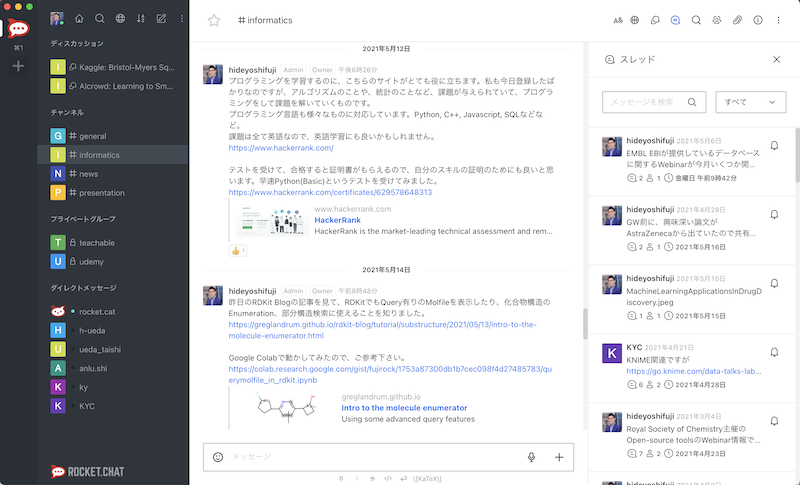

I answer questions on chemoinformatics with Google Colab codes.
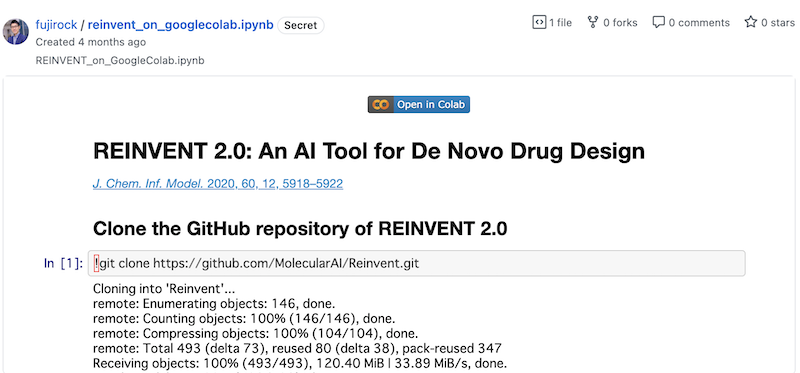

### You Can Get Free Coupon for My Online Udemy Courses
Currently I published several online Udemy courses in which I spoke in only Japanese, but I would like to add English subtitles if there are strong demands.

https://www.udemy.com/user/hideyoshi-fuji/

### You Can Access New Online Course Which Is In Preparation
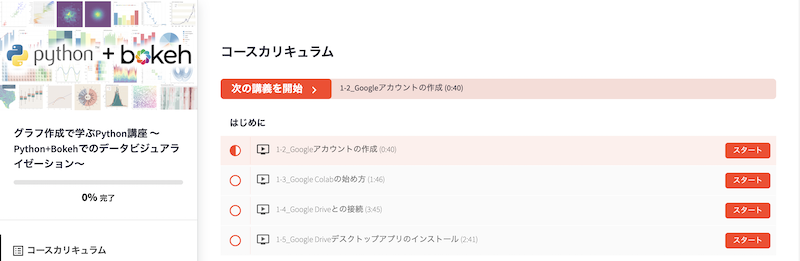

<center>
<h1>
Informagician Research Lab members can take online courses <b>worth 900 USD for free in total</b>.
</h1>
</center>

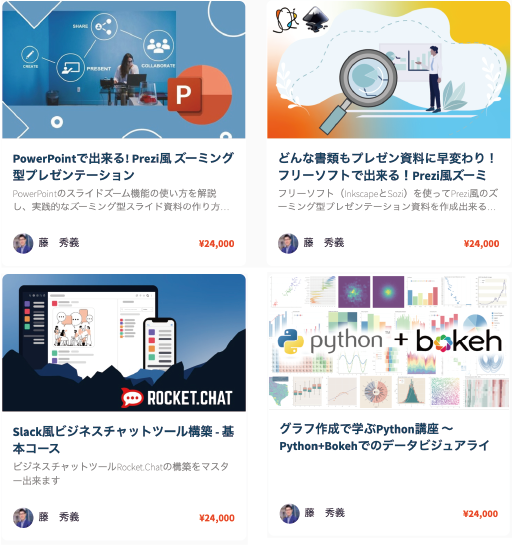

### The Monthly Subscription Price
<center>
<h3>
The monthly subscription price to be a member of Informagician Research Lab is <b>29.9 USD/month</b>.<br>
You can cancel membership whenever you want.
</h3>
</center>

<center>
<h3>
I usually offer <a href="https://school.hideyoshifuji.com/p/online-salon-en/?product_id=2453746&coupon_code=20USDOFF_FIRSTMONTH"><b>20 USD OFF only for the first month</b></a> as a trial.
</h3>
<br>
(COUPON CODE: 20USDOFF_FIRSTMONTH)
<br>
<br>

<center>
<h1>
Special offer of <b>20 USD OFF/month</b> forever* that results in <b>240 USD OFF/year!!</b>
</h1>
<h5>
*The discount will end after you cancel the membership
</h5>

<h2>
<b>The first 10 members</b> will be discounted.<br>
You can get the discount <b>on first come, first served basis</b>.
</h2>

<a href="https://sso.teachable.com/secure/604325/checkout/2453746/online-salon-en?coupon_code=20USDOFF_FOREVER" target="_blank" rel="noopener">
    <button>
              Enroll Now with the Special Discount Coupon $20 OFF/month
    </button>
</a>
<br>
(COUPON CODE: 20USDOFF_FOREVER)

<h5>
The special discount coupon is available until June 30th 2021.
</center>

<br>
<br>
<center>
<h2>
Special offer of <b>10 USD OFF/month</b> forever* that results in <b>120 USD OFF/year!!</b>
</h2>
<h5>
*The discount will end after you cancel the membership
</h5>

<h3>
<b>The first 100 members</b> will be discounted.<br>
You can get the discount <b>on first come, first served basis</b>.
</h3>

<a href="https://sso.teachable.com/secure/604325/checkout/2453746/online-salon-en?coupon_code=10USDOFF_FOREVER" target="_blank" rel="noopener">
    <button>
              Enroll Now with the Special Discount Coupon $10 OFF/month
    </button>
</a>
<br>
(COUPON CODE: 10USDOFF_FOREVER)

<h5>
The special discount coupon is available until June 30th 2021.
</center>

<center>
<br>
<br>
<h1><b>Affiliate Campaign</b></h1>

If Informagician Research Lab members introduce a friend and he/she joins Informagician Research Lab, you will receive 20% of the referral's purchase price of the monthly subscription plan. The reward ratio may change in the future, but the current reward ratio is 20%.

